# Multi-Paulis

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `MultiTargetCNOT`
Implements single control, multi-target $C[X^{\otimes n}]$ gate.

Implements $|0><0| I + |1><1| X^{\otimes n}$ using a circuit of depth $2\log(n) + 1$
containing only CNOT gates.

#### References
 - [Trading T-gates for dirty qubits in state preparation and unitary synthesis](https://arxiv.org/abs/1812.00954). Appendix B.1.


In [2]:
from qualtran.bloqs.mcmt import MultiTargetCNOT

### Example Instances

In [3]:
n = sympy.Symbol('n')
c_multi_not_symb = MultiTargetCNOT(bitsize=n)

In [4]:
c_multi_not = MultiTargetCNOT(bitsize=5)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([c_multi_not_symb, c_multi_not],
           ['`c_multi_not_symb`', '`c_multi_not`'])

### Call Graph

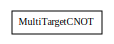

#### Counts totals:
 - `MultiTargetCNOT`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
c_multi_not_symb_g, c_multi_not_symb_sigma = c_multi_not_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(c_multi_not_symb_g)
show_counts_sigma(c_multi_not_symb_sigma)

## `MultiControlX`
Implements multi-control, single-target X gate.

Reduces multiple controls to a single control using an `And` ladder.
See class `ControlledViaAnd` for details on construction.

Alternatively, one can directly use `XGate().controlled(CtrlSpec(cvs=cvs))`

#### Parameters
 - `cvs`: a tuple of `n` control bits, or a `HasLength(n)` to control by `n` 1s. 

#### Registers
 - `controls`: control register of type `QBit` and shape `(n,)`.
 - `target`: single qubit target register.


In [7]:
from qualtran.bloqs.mcmt import MultiControlX

### Example Instances

In [8]:
ccpauli = MultiControlX(cvs=(1, 0, 1, 0, 1))

#### Graphical Signature

In [9]:
from qualtran.drawing import show_bloqs
show_bloqs([ccpauli],
           ['`ccpauli`'])

### Call Graph

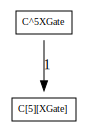

#### Counts totals:
 - `C[5][XGate]`: 1

In [10]:
from qualtran.resource_counting.generalizers import ignore_split_join
ccpauli_g, ccpauli_sigma = ccpauli.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(ccpauli_g)
show_counts_sigma(ccpauli_sigma)